# ECON 407: Problem Set 1
<b>Professor Peifan Wu</b>

<b>Jack (Quan Cheng) Xie</b> <br>
Student #: 31091325

September 30, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# bold string when print
bold = lambda string: '\033[1m'+string+'\033[0m'

# 1 &emsp; Desperate Unemployment

In [2]:
# state transition probabilities

α = 0.4 # P(U, E)
β = 0.1 # P(U, D)
γ = 0.2 # P(E, U)
ϵ = 0.001 # P(D, E)
δ = 0.1 # P(D, U)

## 1.1 Markov Matrix

Let our state space $S = \{0, 1, 2\}$ such that
* `0` denotes unemployed (U)

* `1` denotes employed (E)

* `2` denotes desperate (D)

In [3]:
# define state spaces
state_space = {
    0:'Unemployed (U)',
    1:'Employed (E)',
    2:'Desperate (D)'
}

#### 1. Define a transition matrix (denoted as P) for the Markov chain of the employment status. Be explicit of the ordering of the states and the non-zero elements.

In [4]:
# Question 1.1.1

# creating the transition matrix
P = np.array([
    [1-(α+β), α, β], # state transition probs if unemployed (U)
    [γ, 1-γ, 0],     # state transition probs if employed   (E)
    [δ, ϵ, 1-(ϵ+δ)]  # state transition probs if desperate  (D)
])

# result
print('Transition matrix:')
print(P)

Transition matrix:
[[0.5   0.4   0.1  ]
 [0.2   0.8   0.   ]
 [0.1   0.001 0.899]]


#### 2. Assume that a worker is Unemployed (U) at period 0. Make a figure that shows the probability that the worker will be Employed (E) in period $t$ for all $t = 1, 2, . . . , 40$.

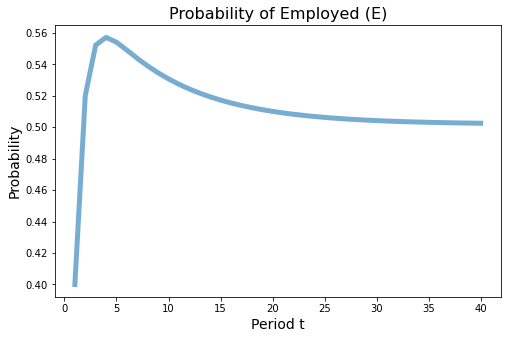

t 	 ψ_{t, 1}
--------------------
1 	 0.4
2 	 0.5201
3 	 0.55222
4 	 0.55714
5 	 0.55405
6 	 0.54898
7 	 0.54376
8 	 0.53892
9 	 0.53457
10 	 0.53072
11 	 0.52731
12 	 0.5243
13 	 0.52165
14 	 0.51931
15 	 0.51725
16 	 0.51543
17 	 0.51383
18 	 0.51241
19 	 0.51116
20 	 0.51006
21 	 0.50909
22 	 0.50824
23 	 0.50749
24 	 0.50682
25 	 0.50623
26 	 0.50572
27 	 0.50526
28 	 0.50486
29 	 0.5045
30 	 0.50419
31 	 0.50392
32 	 0.50367
33 	 0.50346
34 	 0.50327
35 	 0.5031
36 	 0.50296
37 	 0.50283
38 	 0.50271
39 	 0.50261
40 	 0.50252


In [5]:
# Question 1.1.2

ψ = np.array([1,0,0])  # initial distribution (U)
s = 1 # tracking state (E)

s = 1 # state
T = 40 # periods

vals = [] # evolution of probability for state s

for t in range(T):
    ψ = ψ @ P # update distribution
    vals.append(ψ[s]) # append probability of state s 
    
# plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(vals)+1), vals, lw=5, alpha=0.6)

# title/labels
plt.title(f'Probability of {state_space[s]}', fontsize=16)
plt.xlabel('Period t', fontsize=14)
plt.ylabel('Probability', fontsize=14)

plt.show()

# table of results
print(bold('t \t ψ_{t, 1}'))
print(bold('-'*20))
for t, p in enumerate(vals):
    print(t+1, '\t', round(p,5))

#### 3. Assume that a worker is Desperate (D) at period 0. What’s the probability that the worker is Employed (E) at period 4?

In [6]:
# Question 1.1.3

ψ = np.array([0,0,1]) # initial distribution: desperate (D)
s = 1 # tracking state (E)
T = 4 # periods

# table
print(bold('t \t Probability of Employment'))
print(bold('-'*30))
print('0 \t', round(ψ[s], 5))

for t in range(T):
    
    ψ = ψ @ P # update distribution
    
    # show progression of probability
    print(t+1, '\t', round(ψ[s], 5))

# result
print(
    f'\nProbability of employment at period {t+1} is:',
    bold(f'{ψ[s]:.5f}')
)

t 	 Probability of Employment
------------------------------
0 	 0
1 	 0.001
2 	 0.0417
3 	 0.09022
4 	 0.13701

Probability of employment at period 4 is: 0.13701


#### 4. What’s the stationary distribution of U, E and D?

Since the transition matrix is aperiodic and irreducible,

1. $P$ has exactly one stationary distribution $\psi^*$
2. Any initial distribution $\psi_0$ will eventually converge to the stationary distribution $\psi^*$ with repeated multiplication to the transition matrix $P$.

We can find the stationary distribution numerically:

In [7]:
# Question 1.1.4

# transition probability matrix is uniformly ergodic
ψ_t = np.array([1,0,0]) # so we can pick any initial distribution

t = 0 # periods
while True:
    
    t+=1 # update period
    
    # distribution at t-1
    ψ_tminus1 = ψ_t.copy()
    
    # distribution at t
    ψ_t = ψ_t @ P
    
    # change between two periods
    abs_change = abs(ψ_t - ψ_tminus1).sum()
    
    # if no change, break loop
    if abs_change == 0:
        break

# result
print(f'\nSteady state reached numerically at {t} periods.')
print('-'*10)
print('Stationary Distribution')

for i, p in enumerate(ψ_t):
    print(f'{state_space[i]}:\t', bold(f'{p:.5f}'))

print()
print(ψ_t)


Steady state reached numerically at 282 periods.
----------
Stationary Distribution
Unemployed (U):	 0.25031
Employed (E):	 0.50186
Desperate (D):	 0.24783

[0.25030979 0.50185874 0.24783147]


In [8]:
# compute with eigenvector

n = np.shape(P)
w, v = np.linalg.eig(P.T) # compute eigen values and eigen vectors
tmp = v[:, np.isclose(w, 1)][:, 0] # take eigen vector of eignvalue 1
sta_dist = tmp / np.sum(tmp) # normalize vector so sums to 1

print('Stationary distribution:')
print(sta_dist)

Stationary distribution:
[0.25030979 0.50185874 0.24783147]


## 1.2 Worker and Income Simulation


#### 1. Use the transition matrix from the previous part to simulate a path of T = 1000 states for the worker (note: the worker is currently Unemployed)

In [9]:
# Question 1.2.1

s0 = 0 # initial state

res = [s0] # results with inital state

T = 1000 # periods simulated

prob_draw = np.random.rand(T) # draw random va

for t in range(T-1): # T-1 because inital state is already included
    
    # cumulative probability given previous state
    cum_prob = np.cumsum(P[res[-1]])
    
    # add draw result
    res.append(np.searchsorted(cum_prob, prob_draw[t]))
    
# convert to numpy array
res = np.array(res)


# show first 10 results
print(res[:10], '...')
print('Length of simulation result:', len(res))

[0 1 1 0 1 0 1 1 1 1] ...
Length of simulation result: 1000


#### 2. Plot the proportion of time spent employed for the worker for each $t = 1, . . . T$, i.e., $\{\bar{X}_t\}^T_{t=1}$. What's the connection between $\{\bar{X}_t\}^T_{t=1}$ and the stationary distribution?

As $t \to \infty$,  $\bar{X}_t \to \psi^*(E)$, the probability of employment in the stationary distribution. So with a large enough $T$, the sequence $\{\bar{X}_t\}^T_{t=1}$ tends toward the stationary probability of employment.

In [10]:
state_space_2 = {
    0:'(U)',
    1:'(E)',
    2:'(D)'
}

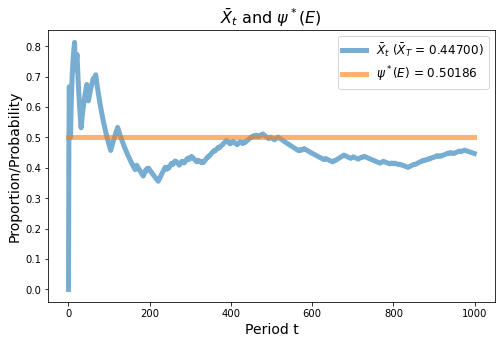

In [11]:
# state of interest
s_star = 1 # employed (E)

# initialize counter for total periods spent in each state
state_t = np.zeros(len(P))

# initialize result for fraction of periods spent in state
X_t_bar = np.zeros((T, len(P)))

# iterate to compute fractional times
for i, s in enumerate(res):
    state_t[s] += 1
    X_t_bar[i] = state_t / (i+1)
    

# plot params
plt.figure(figsize=(8, 5))
line_params = dict(lw=5, alpha=0.6)

# plot proportion of time in employment 
plt.plot(range(T), X_t_bar[:, s_star],
         label="$\\bar{X}_t$ ($\\bar{X}_T$ = "+f"{X_t_bar[-1, s_star]:.5f})",
         **line_params)

# plot probability of employment in stationary distribution
plt.plot(range(T), np.array([sta_dist[s_star]]*T),
         label=f"$\psi^*{state_space_2[s_star]}$ = {sta_dist[s_star]:.5f}",
         **line_params)

# legend
plt.legend(fontsize='large')

# title/labels
plt.title('$\\bar{X}_t$ and'+f' $\psi^*{state_space_2[s_star]}$', fontsize=16)
plt.xlabel('Period t', fontsize=14)
plt.ylabel('Proportion/Probability', fontsize=14)

plt.show()

#### 3. Assume a worker can receive $w_E = 1$ when Employed, and $w_U = w_D = 0.2$ when Unemployed or Desperate. Compute the average expected income with the same state simulation as in the last two parts, plot $\{\bar{W}_t\}^T_{t=1}$. Any observations?

As $t \to \infty$, $\bar{W}_t\ \to E^*[W]$, the expected wage with the stationary distribution.

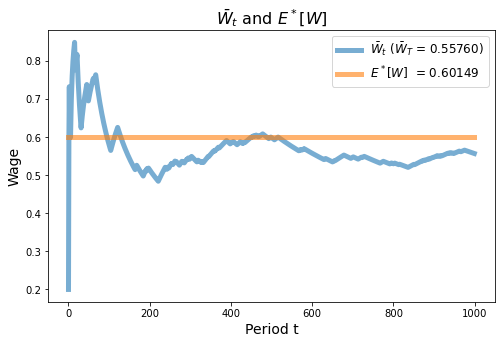

In [12]:
# Question 1.2.3

wages = (0.2, 1, 0.2)

# Average expected income
W_t_bar = X_t_bar@np.array(wages)

# expected wage with stationary distribution
exp_sta_wage = sta_dist@wages

plt.figure(figsize=(8, 5))
line_params = dict(lw=5, alpha=0.6)

# plot proportion of time in employment 
plt.plot(range(T), W_t_bar,
         label="$\\bar{W}_t$ ($\\bar{W}_T$ = "+f"{W_t_bar[-1]:.5f})",
         **line_params)

# plot probability of employment in stationary distribution
plt.plot(range(T), np.array([exp_sta_wage]*T),
         label=f"$E^*[W]$  = {exp_sta_wage:.5f}",
         **line_params)

# legend
plt.legend(fontsize='large')

# title/labels
plt.title('$\\bar{W}_t$ and $E^*[W]$', fontsize=16)
plt.xlabel('Period t', fontsize=14)
plt.ylabel('Wage', fontsize=14)

plt.show()

# 2 &emsp; COVID-19: Time Varying Markov Matrix


#### 1. Write down the Markov transition matrix at time t where the fraction of different types of the total population are $\tilde{S}_t, \tilde{I}_t, \tilde{R}_t$. i.e., What’s the amount of $\tilde{S}_{t+1}, \tilde{I}_{t+1}, \tilde{R}_{t+1}$ given $\tilde{S}_t, \tilde{I}_t, \tilde{R}_t$?

Transition matrix at time $t$:
$$
\begin{align}
    P_t &=
    \begin{bmatrix}
        1 - \beta\tilde{I}_t & \beta\tilde{I}_t & 0 \\
        0 & 1 - \gamma & \gamma \\
        0 & 0 & 1
    \end{bmatrix}
\end{align}
$$

Distribution at ${t+1}$, $\tilde{S}_{t+1}, \tilde{I}_{t+1}, \tilde{R}_{t+1}$ :
$$
\begin{align}
    \psi_{t+1}^T = 
    \begin{bmatrix}
        \tilde{S}_{t+1} \\
        \tilde{I}_{t+1} \\
        \tilde{R}_{t+1} \\
    \end{bmatrix} &=
    P_t^T
    \begin{bmatrix}
        \tilde{S}_{t} \\
        \tilde{I}_{t} \\
        \tilde{R}_{t} \\
    \end{bmatrix}
     = 
    \begin{bmatrix}
        (1 - \beta\tilde{I}_t)\tilde{S}_{t}\\
        \beta\tilde{I}_t\tilde{S}_{t} +
        (1 - \gamma)\tilde{I}_{t+1} \\
        \gamma\tilde{I}_{t+1} + \tilde{R}_{t}
    \end{bmatrix}
\end{align}
$$

So the distribution for $t+1$ is given by:
$$
\begin{align}
    \tilde{S}_{t+1} &= (1 - \beta\tilde{I}_t)\tilde{S}_{t}\\
    \tilde{I}_{t+1} &= \beta\tilde{I}_t\tilde{S}_{t} +
    (1 - \gamma)\tilde{I}_{t+1} \\
    \tilde{R}_{t+1} &= \gamma\tilde{I}_{t+1} + \tilde{R}_{t}
\end{align}
$$

#### 2. Assume $\tilde{S}_0 = 0.98, \tilde{I}_0 = 0.02, \tilde{R}_0 = 0$, and $\beta = 0.3, \gamma = 0.15$. Make a figure that simulates the model for 40 periods.

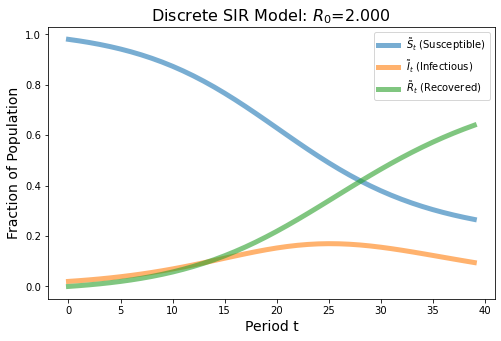

Distribution at T=40: [0.26575887 0.09476363 0.6394775 ]


In [13]:
# Question 2.2

def plot_SIR(
    ini_dist=[0.98, 0.02, 0],
    β=0.3, γ=0.15,
    T=40):


    # initalize distributions
    ψ = np.zeros((T, 3))
    ψ[0] = np.array(ini_dist)

    for t in range(T-1):

        # distribution at time t
        S_tilde_t, I_tilde_t, R_tilde_t = ψ[t]

        # transition matrix at time t
        P_t = np.array([
            [1 - β*I_tilde_t, β*I_tilde_t, 0],
            [0, 1 - γ, γ],
            [0, 0, 1]
        ])

        # update distribution at time t+1
        ψ[t+1] = ψ[t]@P_t

    plt.figure(figsize=(8, 5))

    # plot distribu+tions
    plt.plot(range(len(ψ)), ψ, lw=5, alpha=0.6)

    # legend
    plt.legend(['$\\tilde{S}_t$ (Susceptible)', '$\\tilde{I}_t$ (Infectious)', '$\\tilde{R}_t$ (Recovered)'])

    # title/axis labels
    plt.title(f'Discrete SIR Model: $R_0$={β/γ:.3f}', fontsize=16)
    plt.xlabel('Period t', fontsize=14)
    plt.ylabel('Fraction of Population', fontsize=14)

    plt.show()
    
    return ψ

# call function to plot model
SIR_res = plot_SIR()

# print final distribution
print(f'Distribution at T={len(SIR_res)}:', SIR_res[-1])

#### 3. Describe the results you get from the simulation. What do the three lines look like? When do the maximum and minimum appear of all these three time series?

$\tilde{S}_t$ has maximum at $t=0$ and decreases monotonically, with minimum at $T=40$. Its absolute rate of change first increases and the decreases.

$\tilde{R}_t$ has minimum at $t=0$ and increases monotonically, with maximum at $T=40$. Its absolute rate of change first increases and the decreases.

$\tilde{I}_t$ has minimum at $t=0$ (the sub-population does not reach 0 in 40 periods). Its rate of change changes from positive to negative. It's maximum appears around the time period when $\tilde{S}_t$ intersects $\tilde{R}_t$.

#### 4. (Comparative statics) Now we hold all the other parameters the same, but assume $\beta = 0.4$ instead. We define $R_0 = \frac{\beta}{\gamma}$ ($R_0$ is known as “basic reproduction ratio”). Compare the results you get with what you have from part 2. What conclusion can you draw?

We see similar dynamics in both models, but the time-series appear to evolve faster when we increase $\beta$. In the second model where $R_0$ is increased (from increasing $\beta$) it appears to have the opposite effect of "flattening the ($\tilde{I}_t$) curve.". It "crunches" the curve.

If we increase $\gamma$ to decrease $R_0$, the curve is "flattened" compared to the model under the original parameters.

We can conclude that higher $R_0$ leads to faster evolution of the model's dynamic.

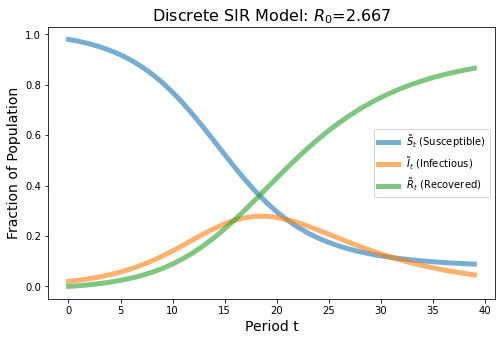

Distribution at T=40: [0.08852987 0.04593471 0.86553542]


In [14]:
# Question 2.4

# plot SIR model
SIR_res = plot_SIR(β=0.4)

# print final distribution
print(f'Distribution at T={len(SIR_res)}:', SIR_res[-1])

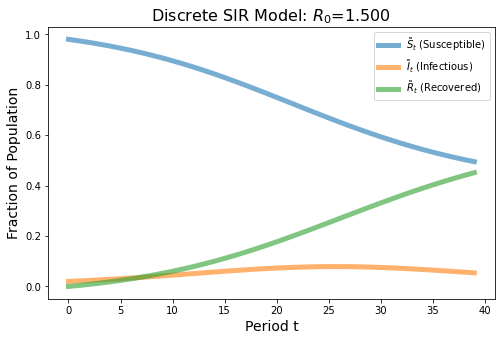

Distribution at T=40: [0.49479217 0.05398266 0.45122516]


In [15]:
# Question 2.4

# increase γ => decrease R_0 => "flattens" infectious curve
SIR_res = plot_SIR(γ=0.2)

# print final distribution
print(f'Distribution at T={len(SIR_res)}:', SIR_res[-1])